In [1]:
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [2]:
trainDF = pd.read_csv('train.csv')
print(trainDF.info())
trainDF.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


PassengerId  Survived  Pclass                  Name     Sex   Age  SibSp   
289          290         1       3  Connolly, Miss. Kate  female  22.0      0  \
815          816         0       1      Fry, Mr. Richard    male   NaN      0   
368          369         1       3   Jermyn, Miss. Annie  female   NaN      0   

     Parch  Ticket  Fare Cabin Embarked  
289      0  370373  7.75   NaN        Q  
815      0  112058  0.00  B102        S  
368      0   14313  7.75   NaN        Q

In [3]:
testDF = pd.read_csv('test.csv')
print(testDF.info())
testDF.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None


PassengerId  Pclass                                               Name   
168         1060       1  Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...  \
293         1185       1                              Dodge, Dr. Washington   
0            892       3                                   Kelly, Mr. James   

        Sex   Age  SibSp  Parch  Ticket     Fare Cabin Embarked  
168  female   NaN      0      0   17770  27.7208   NaN        C  
293    male  53.0      1      1   33638  81.8583   A34        S  
0      male  34.5      0      0  330911   7.8292   NaN        Q

In [4]:
concatDF = pd.concat([trainDF,testDF])
concatDF = concatDF.reset_index(drop=True)
pd.get_dummies(concatDF,columns=['Sex','Embarked']).drop(columns=['PassengerId','Name','Ticket','Cabin']).corr()

Survived    Pclass       Age     SibSp     Parch      Fare   
Survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307  \
Pclass     -0.338481  1.000000 -0.408106  0.060832  0.018322 -0.558629   
Age        -0.077221 -0.408106  1.000000 -0.243699 -0.150917  0.178740   
SibSp      -0.035322  0.060832 -0.243699  1.000000  0.373587  0.160238   
Parch       0.081629  0.018322 -0.150917  0.373587  1.000000  0.221539   
Fare        0.257307 -0.558629  0.178740  0.160238  0.221539  1.000000   
Sex_female  0.543351 -0.124617 -0.063645  0.109609  0.213125  0.185523   
Sex_male   -0.543351  0.124617  0.063645 -0.109609 -0.213125 -0.185523   
Embarked_C  0.168240 -0.269658  0.085777 -0.048396 -0.008635  0.286269   
Embarked_Q  0.003650  0.230491 -0.019458 -0.048678 -0.100943 -0.130059   
Embarked_S -0.155660  0.096335 -0.075972  0.075198  0.073258 -0.172683   

            Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
Survived      0.543351 -0.543351    0.168240    0.003650   -0.155660  
Pclass       -0.124617  0.124617   -0.269658    0.230491    0.096335  
Age          -0.063645  0.063645    0.085777   -0.019458   -0.075972  
SibSp         0.109609 -0.109609   -0.048396   -0.048678    0.075198  
Parch         0.213125 -0.213125   -0.008635   -0.100943    0.073258  
Fare          0.185523 -0.185523    0.286269   -0.130059   -0.172683  
Sex_female    1.000000 -1.000000    0.066564    0.088651   -0.119504  
Sex_male     -1.000000  1.000000   -0.066564   -0.088651    0.119504  
Embarked_C    0.066564 -0.066564    1.000000   -0.164166   -0.775441  
Embarked_Q    0.088651 -0.088651   -0.164166    1.000000   -0.489874  
Embarked_S   -0.119504  0.119504   -0.775441   -0.489874    1.000000

In [5]:
featuredDF = pd.read_csv('train5.csv')
featuredDF['Age'] = featuredDF['Age']/featuredDF['Age'].max()
featuredDF['Fare'] = featuredDF['Fare']/featuredDF['Fare'].max()
featuredDF

PassengerId  Survived    Pclass       Sex      Age     SibSp     Parch   
0               1       0.0  0.242363  0.188908  0.27500  0.535885  0.343658  \
1               2       1.0  0.629630  0.742038  0.47500  0.535885  0.343658   
2               3       1.0  0.242363  0.742038  0.32500  0.345395  0.343658   
3               4       1.0  0.629630  0.742038  0.43750  0.535885  0.343658   
4               5       0.0  0.242363  0.188908  0.43750  0.345395  0.343658   
...           ...       ...       ...       ...      ...       ...       ...   
1304         1305       NaN  0.242363  0.188908  0.33750  0.345395  0.343658   
1305         1306       NaN  0.629630  0.742038  0.48750  0.345395  0.343658   
1306         1307       NaN  0.242363  0.188908  0.48125  0.345395  0.343658   
1307         1308       NaN  0.242363  0.188908  0.33750  0.345395  0.343658   
1308         1309       NaN  0.242363  0.188908  0.30000  0.535885  0.550847   

          Fare  Embarked      Name     Cabin    Ticket  
0     0.014151  0.339009  0.156673  0.299854  0.270270  
1     0.139136  0.553571  0.782000  0.593220  0.513812  
2     0.015469  0.339009  0.697802  0.299854  0.270270  
3     0.103644  0.339009  0.782000  0.593220  0.513812  
4     0.015713  0.339009  0.156673  0.299854  0.270270  
...        ...       ...       ...       ...       ...  
1304  0.015713  0.339009  0.156673  0.299854  0.270270  
1305  0.212559  0.553571  1.000000  0.593220  0.653465  
1306  0.014151  0.339009  0.156673  0.299854  0.270270  
1307  0.015713  0.339009  0.156673  0.299854  0.270270  
1308  0.043640  0.553571  0.575000  0.299854  0.653465  

[1309 rows x 12 columns]

In [6]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, DF:pd.DataFrame):
        self.PassengerId= DF['PassengerId'].values
        self.Servived = pd.get_dummies(DF['Survived']).values
        DF = DF.drop(columns=['PassengerId','Survived'])
        self.data = DF.astype(float).values
        pass

    def __len__(self):
        return len(self.PassengerId)

    def __getitem__(self, idx):

        id = self.PassengerId[idx]
        x = torch.FloatTensor(self.data[idx])
        y = torch.FloatTensor(self.Servived[idx])
        return x, y , id


dataSet = MyDataset(DF=featuredDF[:891])
testSet = MyDataset(DF=featuredDF[891:])
testSet[0]

(tensor([0.2424, 0.1889, 0.4313, 0.3454, 0.3437, 0.0153, 0.3896, 0.1567, 0.2999,
         0.2703]),
 tensor([]),
 892)

In [7]:

trainSet, valSet = torch.utils.data.random_split(dataSet,(0.8,0.2))

In [8]:
trainLoader= torch.utils.data.DataLoader(trainSet,batch_size=1024,sampler=torch.utils.data.RandomSampler(trainSet))
valLoader= torch.utils.data.DataLoader(valSet,batch_size=1024,sampler=torch.utils.data.RandomSampler(valSet))
testLoader = torch.utils.data.DataLoader(testSet,batch_size=1024)
next(iter(trainLoader))

[tensor([[0.6296, 0.1889, 0.5625,  ..., 0.1567, 0.2999, 0.2703],
         [0.2424, 0.1889, 0.5250,  ..., 0.1567, 0.2999, 0.2703],
         [0.2424, 0.1889, 0.2500,  ..., 0.1567, 0.2999, 0.2703],
         ...,
         [0.2424, 0.7420, 0.2375,  ..., 0.6978, 0.2999, 0.2703],
         [0.2424, 0.1889, 0.3250,  ..., 0.1567, 0.2999, 0.2703],
         [0.4728, 0.1889, 0.3875,  ..., 0.1567, 0.2999, 0.6535]]),
 tensor([[0., 1.],
         [1., 0.],
         [1., 0.],
         ...,
         [0., 1.],
         [1., 0.],
         [1., 0.]]),
 tensor([188, 350, 442, 625, 216, 311, 553, 431, 306, 178, 245, 774,  17, 391,
         507, 814, 348, 569, 339, 651, 126, 781,  63, 508, 428, 746, 489, 816,
           3, 675,  56, 396, 107, 653, 686, 345, 758, 596, 229,  61, 517, 574,
         845, 419, 156, 617, 871, 519,  38, 733, 201, 490, 320, 260, 609, 544,
         329,  79, 580, 445, 856, 224, 120, 166, 139, 134, 582, 524, 691, 715,
         481, 180, 100, 527, 612,  72, 642, 347, 735, 692, 757,   2, 

In [9]:
# Get cpu, gpu or mps device for training.
# device = (
#     "cuda"
#     if torch.cuda.is_available()
#     else "mps"
#     if torch.backends.mps.is_available()
#     else "cpu"
# )
# print(f"Using {device} device")

device='cpu'

In [10]:

# Define model
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = torch.nn.Sequential(
            torch.nn.Linear(10, 30),
            torch.nn.ReLU(),
            torch.nn.Linear(30, 2),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=10, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=6, bias=True)
    (3): ReLU()
    (4): Linear(in_features=6, out_features=4, bias=True)
    (5): ReLU()
    (6): Linear(in_features=4, out_features=2, bias=True)
  )
)


In [11]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters())

cnt: 0 - valLoss: 0.7691343426704407 - trainLoss: 0.7475048303604126
cnt: 0 - valLoss: 0.7690088748931885 - trainLoss: 0.7474086880683899
cnt: 0 - valLoss: 0.768883466720581 - trainLoss: 0.7473126649856567
cnt: 0 - valLoss: 0.7687584757804871 - trainLoss: 0.7472165822982788
cnt: 0 - valLoss: 0.7686335444450378 - trainLoss: 0.7471209168434143
cnt: 0 - valLoss: 0.7685089707374573 - trainLoss: 0.7470253109931946
cnt: 0 - valLoss: 0.7683843374252319 - trainLoss: 0.746929943561554
cnt: 0 - valLoss: 0.76826012134552 - trainLoss: 0.7468345761299133
cnt: 0 - valLoss: 0.768136203289032 - trainLoss: 0.746739387512207
cnt: 0 - valLoss: 0.7680125832557678 - trainLoss: 0.7466444969177246
cnt: 0 - valLoss: 0.7678890228271484 - trainLoss: 0.7465500235557556
cnt: 0 - valLoss: 0.7677655816078186 - trainLoss: 0.7464554309844971
cnt: 0 - valLoss: 0.7676426768302917 - trainLoss: 0.7463611960411072
cnt: 0 - valLoss: 0.7675197720527649 - trainLoss: 0.7462671995162964
cnt: 0 - valLoss: 0.7673969268798828 - t

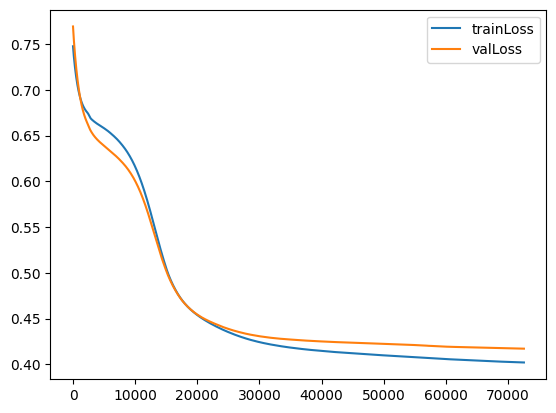

In [12]:
def trainAI(dataloader, model, loss_fn, optimizer):
    model.train()
    trainLoss=0
    for X, y,_ in dataloader:
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        trainLoss +=loss.item()

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    return trainLoss

def valAI(dataloader, model, loss_fn):
    model.eval()
    valLoss =0
    with torch.no_grad():
        for X ,y,_ in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            loss = loss_fn(pred, y)
            # for i in loss:
            valLoss+= loss.item()
    return valLoss

trainLoss=[]
valLoss=[]
bestModel = model
bestLoss = float('inf')
cnt=0

while(cnt<100):
    trainLoss.append(trainAI(trainLoader, model, loss_fn, optimizer))
    valLoss.append(valAI(valLoader, model, loss_fn))

    print(f'cnt: {cnt} - valLoss: {valLoss[-1]} - trainLoss: {trainLoss[-1]}')
    if bestLoss<valLoss[-1]:
        cnt+=1
    else:
        cnt = 0
        bestLoss = valLoss[-1]
        bestModel = model

plt.plot(trainLoss,label='trainLoss')
plt.plot(valLoss,label='valLoss')
plt.legend()

In [13]:
def accuracyAI(dataloader, model):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X, y, _  in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)

            for idx, i in enumerate(pred):
                if torch.argmax(i)== torch.argmax(y[idx]):
                    correct +=1 
                total+=1
    return correct / total

accuracyAI(valLoader, bestModel)

0.8258426966292135

In [14]:
def testAI(dataloader, model):
    model.eval()
    result = []
    with torch.no_grad():
        for X ,_ , id in dataloader:
            X  = X.to(device)
            pred = model(X)
            for idx, i in enumerate(pred):
                result.append([id[idx],torch.argmax(i).item()])
    return result

result = testAI(testLoader, bestModel)
result = pd.DataFrame(result)
result = result.astype(int)
result.columns=['passengerId','Survived']
result

passengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]

In [15]:
result.to_csv('result.csv',index=False)